In [1]:
import pandas as pd

/Users/hannahkaplan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("Anomaly.csv")

In [4]:
#looking at info on anomaly
df.describe()

,Positive,Negative,Year
count,14.000000,14.000000,14.0
mean,0.128786,0.102571,2014.0
std,0.053368,0.059747,0.0
min,0.063000,0.051000,2014.0
25%,0.077750,0.056000,2014.0
50%,0.124500,0.075500,2014.0
75%,0.167000,0.124000,2014.0
max,0.217000,0.240000,2014.0


In [10]:
#chekcing to see they all imported
df.Lyrics

0     i wont stay here another night if i gotta sacr...
1     ladies and gentlemen good afternoon from the f...
2     say i wont why yall scared to be different say...
3     even though i walk through the valley of the s...
4     i never fit in i was a outcast in grade school...
5     lights off aint nobody watchin me i heard abou...
6     hold up hold up hold up yall gon get me bowed ...
7     yeah i wish i never held back wish nobody had ...
8     hey fellas where are the treadmills oh they ri...
9     all i need is you all i need is you keep me in...
10    clears throat aright lets do this i’m giving i...
11    ooh come on everybody sit down sit down people...
12    i’m just a broken instrument in the hands of t...
13    calling all the messengers calling all the mes...
Name: Lyrics, dtype: object

In [6]:
#checking one full song
df.Lyrics[0]

'i wont stay here another night if i gotta sacrifice who i am on the inside id rather be an outsider and you can stay if you like ill see you on the other side i wanna live the free life id rather be an outsider id rather be an outsider id rather be an outsider id rather be an outsider id rather be an outsider yeah id rather be an outsider outsider i really cant tell if im overdressed or im underdressed if im underpaid or just overstressed if im cynical or just over this cause im tired of tryna get over there man its over there partys over partys over you probably couldnt tell we over here cause you hardly sober double shots of that ego they laughin at us yeah we know may be at the bottom but we not forgotten the directors plotting that sequel til then we live on the outside and it might storm and we might die but id rather go with my fist high standing outside of your inside i tried my best to fit in yeah looking for a suit to fit in yeah standing outside of your prison i tried tryna 

In [8]:
#removing stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['hm','oh','yeah','let','ive','go','im','yall','thats','woo','still','gotta','goin','cause','youre','come','know',
                  'woo','back','made','every','uh','hmm','em','like','til','yah','yeahyeahyeah','yeahyeahyeahyeahyeahyeahyeahyea',
                  'youll','yet','years','xhosa','ya', 'yeahyeahyeahyeahyeahyeahyeahyeah','zulu','would','woulda', 'like','see','saw',
                  'just','oh','writenow','put','til','cant','cause'])

In [14]:
#vectorizing words
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df= 0.1)
vectors = vectorizer.fit_transform(df['Lyrics'])
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

,act,actin,actually,address,african,aint,allegiance,almost,alone,already,...,whole,win,wind,wish,wonder,wont,work,world,yea,yo
0,0.000000,0.0,0.0,0.000000,0.0,0.05959,0.000000,0.0,0.073758,0.036879,...,0.000000,0.0,0.000000,0.000000,0.000000,0.059319,0.000000,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.069886,...,0.051322,0.0,0.000000,0.062182,0.000000,0.000000,0.069886,0.0,0.000000,0.000000
2,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,...,0.022766,0.0,0.000000,0.000000,0.000000,0.673169,0.000000,0.0,0.000000,0.045532
3,0.043735,0.0,0.0,0.098309,0.0,0.05295,0.049155,0.0,0.000000,0.000000,...,0.000000,0.0,0.049155,0.000000,0.039532,0.039532,0.000000,0.0,0.049155,0.036098
4,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [16]:
df_lyrics = df.Lyrics

In [3]:
#prepping wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [41]:
text = open('anomalylyrics.csv').read()
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.extend(['hm','oh','yeah','let','ive','go','im','yall','thats','woo','still','gotta','goin','cause','youre','come','know',
                  'woo','back','made','every','uh','hmm','em','like','til','yah','yeahyeahyeah','yeahyeahyeahyeahyeahyeahyeahyea',
                  'youll','yet','years','xhosa','ya', 'yeahyeahyeahyeahyeahyeahyeahyeah','zulu','would','woulda', 'like','see','saw',
                  'just','oh','writenow','put','til','cant','cause','hey','di','da','ooh','na','ta','tryna','id','say',
                 'dont','got','wanna','boy','could','get','aint','maybe','probably','could','thing','something','way',
                 'gon','whats','man','time','never','life','keep','wish','wont','well','might'])

In [42]:
wc =WordCloud (
        background_color = 'white',
        stopwords = stopwords,
        height = 600,
        width =400

)

In [43]:
wc.generate(text)

In [44]:
wc.to_file("wordcloud_anomaly.png")

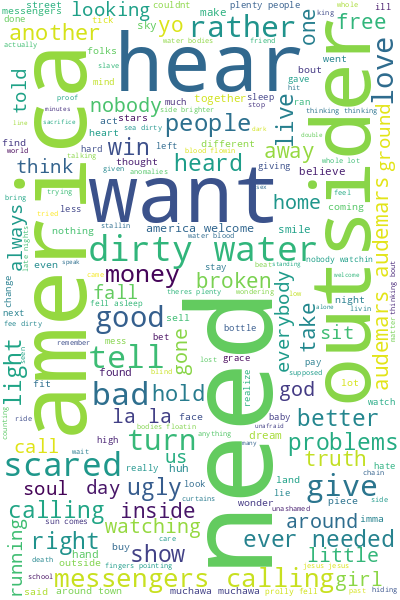

Gravity 2012 - data

In [35]:
df2 = pd.read_csv("Gravity2012.csv")

In [111]:
df2.describe()

,Unnamed: 0,Positive,Negative,Year
count,18.00000,18.000000,18.000000,18.0
mean,78.50000,0.129333,0.134333,2012.0
std,32.81723,0.047631,0.086833,0.0
min,21.00000,0.068000,0.074000,2012.0
25%,58.00000,0.099250,0.090250,2012.0
50%,82.00000,0.121000,0.122000,2012.0
75%,95.50000,0.147250,0.139750,2012.0
max,157.00000,0.251000,0.466000,2012.0


In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [45]:
text = open('GravityLyrics.csv').read()
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.extend(['hm','oh','yeah','let','ive','go','im','yall','thats','woo','still','gotta','goin','cause','youre','come','know',
                  'woo','back','made','every','uh','hmm','em','like','til','yah','yeahyeahyeah','yeahyeahyeahyeahyeahyeahyeahyea',
                  'youll','yet','years','xhosa','ya', 'yeahyeahyeahyeahyeahyeahyeahyeah','zulu','would','woulda', 'like','see','saw',
                  'just','oh','writenow','put','til','cant','cause','hey','di','da','ooh','na','ta','tryna','id',
                 'get','gon','us','got','make','say','aint','dont','really','wanna','keep','going','ever','set',
                 'thing','son','one','buttons','ye','going','never','life','man','world','tell'])

In [46]:
wc =WordCloud (
        background_color = 'white',
        stopwords = stopwords,
        height = 600,
        width =400

)

In [47]:
wc.generate(text)

In [48]:
wc.to_file("wordcloud_gravity.png")

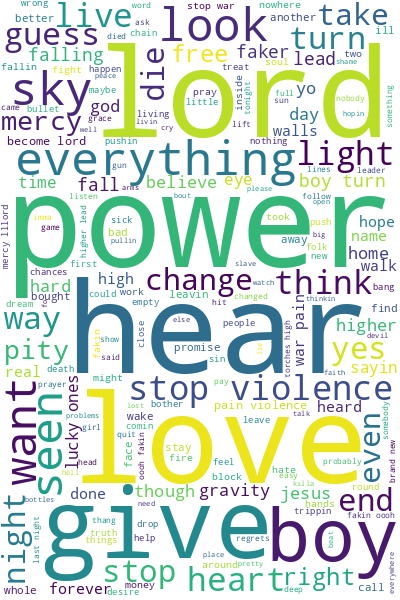

Real Talk 2004

In [54]:
df3 = pd.read_csv("Realtalk2004.csv")

In [55]:
df3

,Unnamed: 0,Artist,title,lyrics,Positive,Negative,Year
0,148,Lecrae,souled out,man i consider my life nothing if i could just...,0.136,0.106,2005
1,167,Lecrae,we dont,i aint the standard at all and wouldnt claim t...,0.100,0.094,2005
2,146,Lecrae,aliens,aliens foreign call us we are aliens foreign c...,0.146,0.060,2005
3,164,Lecrae,crossover,you can find me in the church focused and aler...,0.182,0.117,2005
4,152,Lecrae,represent,represent get krunk represent get krunk if you...,0.068,0.173,2005
5,202,Lecrae,real talk interlude,man i feel what you saying cuz but man aint no...,0.127,0.012,2004
6,78,Lecrae,take me as i am,grace through faith i talked to a cat the othe...,0.138,0.171,2004
7,170,Lecrae,tha church,ladies and gentlemen id like to interrupt this...,0.153,0.068,2004
8,199,Lecrae,nothin,i appreciate the love when i rock the stage bu...,0.183,0.043,2004
9,197,Lecrae,the line,you know its on and popping and aint no stoppi...,0.114,0.062,2004


In [56]:
df3.describe()

,Unnamed: 0,Positive,Negative,Year
count,16.000000,16.000000,16.000000,16.000000
mean,168.250000,0.149625,0.091750,2004.500000
std,32.388269,0.071006,0.053215,0.516398
min,78.000000,0.068000,0.012000,2004.000000
25%,152.000000,0.110500,0.057000,2004.000000
50%,167.500000,0.137500,0.082500,2004.500000
75%,190.250000,0.182250,0.125250,2005.000000
max,220.000000,0.363000,0.173000,2005.000000


In [57]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [53]:
text = open('realtalklyrics.csv').read()
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.extend(['hm','oh','yeah','let','ive','go','im','yall','thats','woo','still','gotta','goin','cause','youre','come','know',
                  'woo','back','made','every','uh','hmm','em','like','til','yah','yeahyeahyeah','yeahyeahyeahyeahyeahyeahyeahyea',
                  'youll','yet','years','xhosa','ya', 'yeahyeahyeahyeahyeahyeahyeahyeah','zulu','would','woulda', 'like','see','saw',
                  'just','oh','writenow','put','til','cant','cause','hey','di','da','ooh','na','ta','tryna','id',
                 'get','gon','us','got','make','say','dont','till','whatchu','aint','life','world','way','nothing','man',
                 'wanna','take','even','name','thing'])

In [54]:
wc =WordCloud (
        background_color = 'white',
        stopwords = stopwords,
        height = 600,
        width =400

)

In [55]:
wc.generate(text)

In [56]:
wc.to_file("wordcloud_realtalk.png")

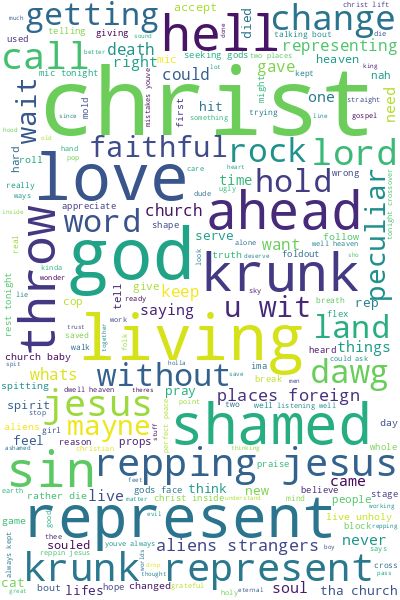

Restoration 2020

In [69]:
df4 = pd.read_csv('restoration2020.csv')

In [70]:
df4

,Artist,Title,Lyrics,Positive,Negative,Year
0,Lecrae,restore me,restore me restore me i lost everything i had ...,0.128,0.268,2020
1,Lecrae,set me free,take the shackles off my feet so i can dance i...,0.223,0.049,2020
2,Lecrae,wheels up,and for one second all my problems fade to gra...,0.151,0.079,2020
3,Lecrae,over the top,you a fool for this one over the top uh top ai...,0.242,0.031,2020
4,Lecrae,self discovery,he was a smart kid it was always about lecrae ...,0.111,0.104,2020
5,Lecrae,deep end,writenow ive been tryin not to go off the deep...,0.118,0.105,2020
6,Lecrae,drown,tell me that youll never let me down down down...,0.137,0.120,2020
7,Lecrae,sunday morning,i been messed up yeah stressed out with no luc...,0.283,0.076,2020
8,Lecrae,saturday night,is this real this is all unknown makes me feel...,0.197,0.071,2020
9,Lecrae,zombie,say blessed say blessed say blessed yeah i was...,0.225,0.083,2020


In [71]:
df4.describe()

,Positive,Negative,Year
count,14.000000,14.000000,14.0
mean,0.170857,0.096929,2020.0
std,0.061212,0.054763,0.0
min,0.070000,0.031000,2020.0
25%,0.129500,0.076750,2020.0
50%,0.149500,0.083500,2020.0
75%,0.224500,0.104750,2020.0
max,0.283000,0.268000,2020.0


In [69]:
text = open('RestorationLyrics.csv').read()
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.extend(['hm','oh','yeah','let','ive','go','im','yall','thats','woo','still','gotta','goin','cause','youre','come','know',
                  'woo','back','made','every','uh','hmm','em','like','til','yah','yeahyeahyeah','yeahyeahyeahyeahyeahyeahyeahyea',
                  'youll','yet','years','xhosa','ya', 'yeahyeahyeahyeahyeahyeahyeahyeah','zulu','would','woulda', 'like','see','saw',
                  'just','oh','writenow','put','til','cant','cause','get','got','aint','dont','tryna','ooh','dont',
                 'never','time','need','wanna','gon','day','said','make','baby','far','way','ima','feet','top','keep'])

In [70]:
wc =WordCloud (
        background_color = 'white',
        stopwords = stopwords,
        height = 600,
        width =400

)

In [71]:
wc.generate(text)

In [72]:
wc.to_file("wordcloud_restoration.png")

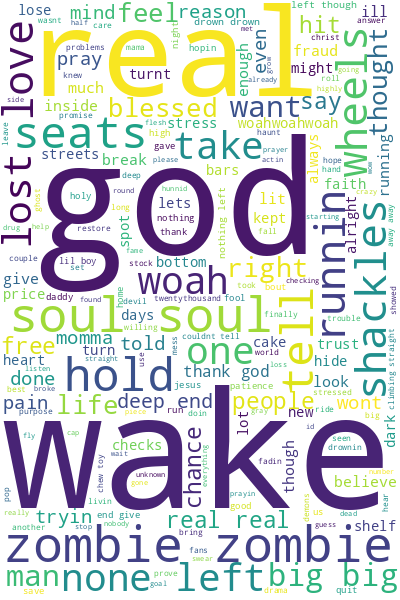

Rebel 2008 

In [72]:
df5 = pd.read_csv("Rebel2008.csv")

In [73]:
df5

,Unnamed: 0,Artist,title,lyrics,Positive,Negative,Year
0,77,Lecrae,rebel intro,yeah just wanna dive into the beat swim around...,0.084,0.199,2008
1,31,Lecrae,don’t waste your life,lets go dont waste your life man i know a lot ...,0.154,0.043,2008
2,100,Lecrae,go hard,go hard go hard or go home go home go hard go ...,0.074,0.127,2008
3,114,Lecrae,identity,uhhuh uhhuh uhhuh uhhuh uhhuh uhhuh uhhuh uhhu...,0.172,0.112,2008
4,123,Lecrae,indwelling sin,aye look whats good man its me again the one y...,0.143,0.124,2008
5,155,Lecrae,breathin to death,its like im tired of life lord im wrong why i ...,0.116,0.220,2008
6,119,Lecrae,desperate,our father forgive us our trespasses as we for...,0.232,0.179,2008
7,150,Lecrae,change,you done had it with this if broke is a habit ...,0.103,0.178,2008
8,161,Lecrae,fall back,i know you might of seen it on the tv you hear...,0.156,0.152,2008
9,181,Lecrae,live free,i i im free from sin from free from death from...,0.294,0.158,2008


In [74]:
df5.describe()

,Unnamed: 0,Positive,Negative,Year
count,14.000000,14.000000,14.000000,14.0
mean,127.642857,0.151286,0.142286,2008.0
std,40.263760,0.062242,0.046967,0.0
min,31.000000,0.073000,0.043000,2008.0
25%,113.250000,0.106250,0.114000,2008.0
50%,129.500000,0.154500,0.139500,2008.0
75%,157.250000,0.168750,0.177750,2008.0
max,181.000000,0.294000,0.220000,2008.0


In [79]:
text = open('RebelLyrics.csv').read()
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.extend(['hm','oh','yeah','let','ive','go','im','yall','thats','woo','still','gotta','goin','cause','youre','come','know',
                  'woo','back','made','every','uh','hmm','em','like','til','yah','yeahyeahyeah','yeahyeahyeahyeahyeahyeahyeahyea',
                  'youll','yet','years','xhosa','ya', 'yeahyeahyeahyeahyeahyeahyeahyeah','zulu','would','woulda', 'like','see','saw',
                  'just','oh','writenow','put','til','cant','cause','get','got','aint','use','wanna', 'life','dont',
                 'never','man','tell','tryna','day','shes'])

In [80]:
wc =WordCloud (
        background_color = 'white',
        stopwords = stopwords,
        height = 600,
        width =400

)

In [81]:
wc.generate(text)

In [82]:
wc.to_file("wordcloud_rebel.png")

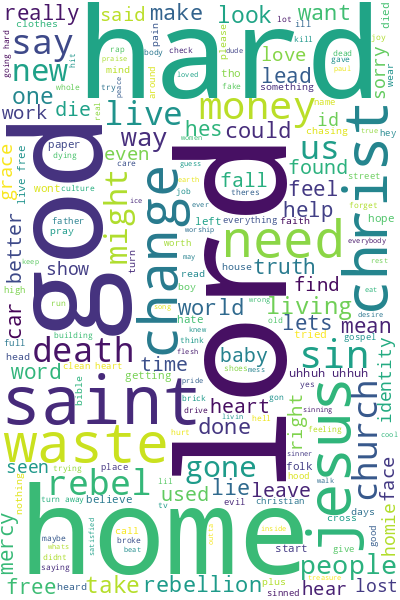

  Looking at All Things Work Together - 2017

In [92]:
df6 = pd.read_csv("allthingsworktogether2017.csv")

In [93]:
df6

,Unnamed: 0,Artist,title,lyrics,Positive,Negative,Year
0,0,Lecrae,ill find you,just fight a little longer my friend its all w...,0.144,0.091,2017
1,1,Lecrae,blessings,ear drummers ooh yeah ooh yeah if i ever took ...,0.210,0.046,2017
2,4,Lecrae,cry for you,this thorn in my flesh is the only thing i got...,0.166,0.218,2017
3,6,Lecrae,whatchu mean,go grizz winners circle whatchu mean now whatc...,0.153,0.052,2017
4,8,Lecrae,hammer time,if young metro dont trust you im gon shoot you...,0.067,0.077,2017
5,13,Lecrae,facts,peace does not come before salvation and salva...,0.146,0.079,2017
6,14,Lecrae,broke,being broke in this thing dont sit right do it...,0.252,0.163,2017
7,18,Lecrae,Eight twenty eight,its gon all work out sooner than later you don...,0.168,0.115,2017
8,28,Lecrae,worth it,its just a little dirt its just a little stain...,0.230,0.098,2017
9,29,Lecrae,can’t stop me now destination,hey all those feelings of depression and doubt...,0.105,0.176,2017


In [94]:
df6.describe()

,Unnamed: 0,Positive,Negative,Year
count,14.000000,14.000000,14.000000,14.0
mean,21.642857,0.172286,0.097643,2017.0
std,18.202312,0.070883,0.058468,0.0
min,0.000000,0.067000,0.010000,2017.0
25%,6.500000,0.126000,0.052750,2017.0
50%,16.000000,0.159500,0.085000,2017.0
75%,34.250000,0.221250,0.133000,2017.0
max,53.000000,0.331000,0.218000,2017.0


In [87]:
text = open('allthingsworktogetherlyrics.csv').read()
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.extend(['hm','oh','yeah','let','ive','go','im','yall','thats','woo','still','gotta','goin','cause','youre','come','know',
                  'woo','back','made','every','uh','hmm','em','like','til','yah','yeahyeahyeah','yeahyeahyeahyeahyeahyeahyeahyea',
                  'youll','yet','years','xhosa','ya', 'yeahyeahyeahyeahyeahyeahyeahyeah','zulu','would','woulda', 'like','see','saw',
                  'just','oh','writenow','put','til','cant','cause','get','got','aint','use','wanna', 'life','dont','tryna','ill','gon',
                 'say','hammer','watchu','boy','whatchu','mean','make','man','well','ayy','thing','way','bout',
                 'keep','could','sail','baby','prolly','time','never','tell','wish'])

In [88]:
wc =WordCloud (
        background_color = 'white',
        stopwords = stopwords,
        height = 600,
        width =400

)

In [89]:
wc.generate(text)

In [90]:
wc.to_file("wordcloud_allthings.png")

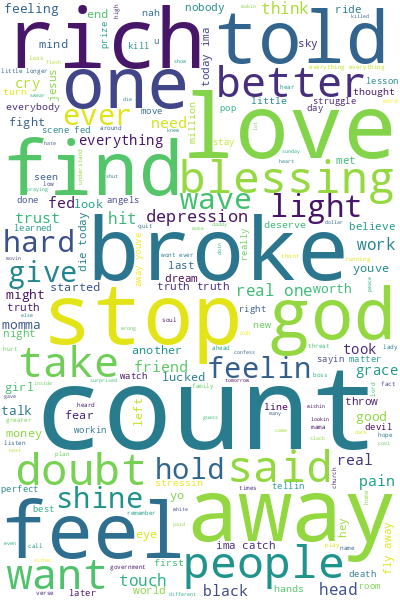